# Google Playstore

## Load in Dataset

In [227]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

nRowsRead = None
df = pd.read_csv('data/Google-Playstore.csv', delimiter=',', nrows = nRowsRead)
df.dataframeName = 'Google-Playstore-32K.csv'

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118136 entries, 0 to 1118135
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   App Name           1118135 non-null  object 
 1   App Id             1118136 non-null  object 
 2   Category           1118133 non-null  object 
 3   Rating             1111286 non-null  float64
 4   Rating Count       1111286 non-null  float64
 5   Installs           1117975 non-null  object 
 6   Minimum Installs   1117975 non-null  float64
 7   Maximum Installs   1118136 non-null  int64  
 8   Free               1118136 non-null  bool   
 9   Price              1118136 non-null  float64
 10  Currency           1117975 non-null  object 
 11  Size               1118136 non-null  object 
 12  Minimum Android    1116123 non-null  object 
 13  Developer Id       1118134 non-null  object 
 14  Developer Website  703770 non-null   object 
 15  Developer Email    1118114 non-n

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560,True,0.0,...,Xavier Roche,http://www.httrack.com/,roche+android@httrack.com,"Aug 12, 2013","May 20, 2017",Everyone,http://android.httrack.com/privacy-policy.html,False,False,False
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778,True,0.0,...,Skizze Games,http://stereo7.com/,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,https://www.iubenda.com/privacy-policy/8032781,True,True,False
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739,True,0.0,...,TheMauSoft,http://www.themausoft.com,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,https://sites.google.com/view/wpsapppolicy/main,True,False,False
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067,True,0.0,...,MobiSystems,http://www.mobisystems.com,support-officesuite-android@mobisystems.com,"Dec 22, 2011","Nov 23, 2020",Everyone,http://www.mobisystems.com/mobile/privacy-poli...,True,True,False
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,"50,000+",50000.0,73463,True,0.0,...,Arthelion92,http://www.arthelion.com,arthelion92@gmail.com,"Sep 24, 2016","Nov 22, 2020",Everyone,http://www.arthelion.com/index.php/fr/android-...,False,False,False


## Cleaning

### Remove irrelevant columns

In [228]:
df = df.drop(['App Id', 'Currency', 'Developer Website', 'Developer Email', 'Privacy Policy', 'Size', 'Price'], axis=1)

### Combine duplicate categories

In [229]:
# Collapse 'Music' and 'Music & Audio' into 'Music'
df['Category'] = df['Category'].str.replace('Music & Audio', 'Music')

# Collapse 'Educational' and 'Education' into 'Education'
df['Category'] = df['Category'].str.replace('Educational', 'Education')

### Remove paid apps

In [230]:
df = df[df['Free'] != False]

### Remove irrelevant categories

In [241]:
irrelevant_cat = ['Puzzle', 
                  'Arcade', 
                  'Simulation', 
                  'Action', 
                  'Adventure', 
                  'Racing', 
                  'Role Playing', 
                  'Board', 
                  'Strategy', 
                  'Casino', 
                  'Card', 
                  'Word', 
                  'Sports', 
                  'Trivia']

for cat in irrelevant_cat:
    df = df.drop(df.index[df['Category'] == cat])

### Drop missing values

In [242]:
df.dropna(inplace=True)

## Plots

### Number of installations

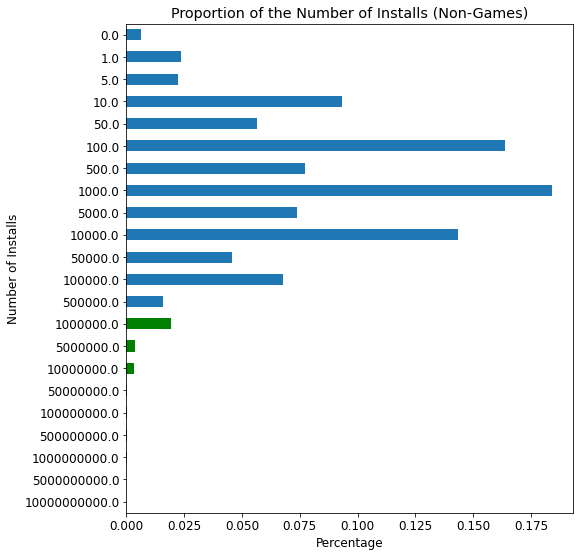

In [277]:
plt.rcParams.update({'font.size': 12, 'figure.figsize': (8, 9)})
plt.ylabel('Number of Installs')
plt.xlabel('Percentage')
plus_mill = ['tab:blue' if (x >= 10000) else 'green' for x in df['Minimum Installs'].value_counts()]
df['Minimum Installs'].value_counts(normalize=True).sort_index().plot(kind="barh", title='Proportion of the Number of Installs (Non-Games)', color=plus_mill);
plt.gca().invert_yaxis()

### Correlation with ratings and installation

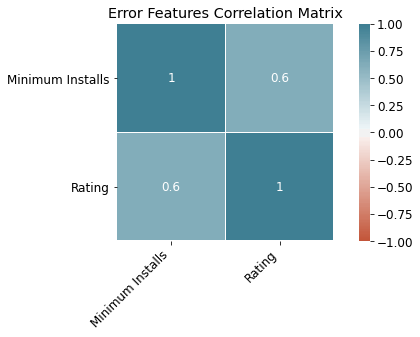

In [237]:
rating_installation = df[['Minimum Installs', 'Rating']]

corr = rating_installation.corr(method='spearman')

fig, ax = plt.subplots(figsize=(9, 4))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt=".1n",
    linewidths=.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    
);
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right',
);
plt.title("Error Features Correlation Matrix")
ax

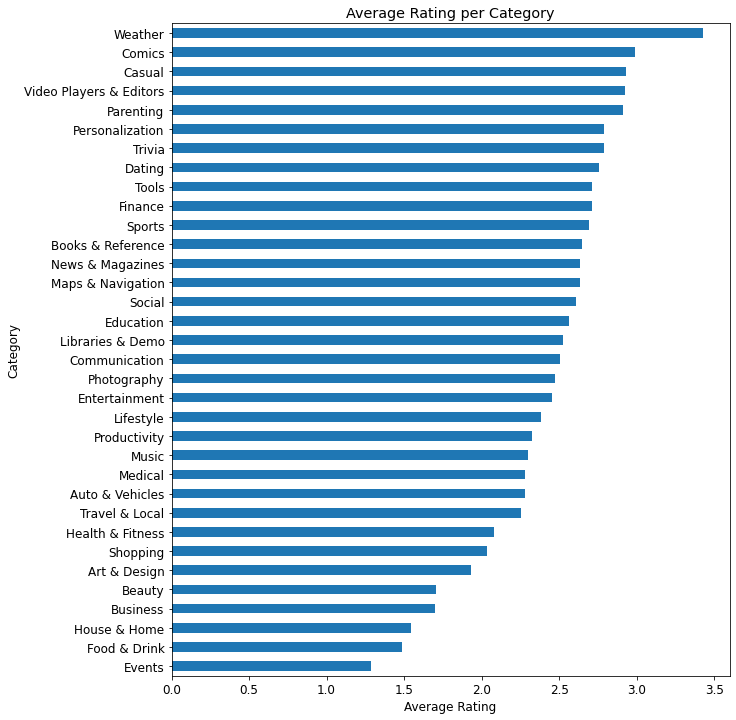

In [238]:
all_apps = df.groupby('Category')['Rating'].mean()

plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 12)})
plt.ylabel('Category')
plt.xlabel('Average Rating')
all_apps.sort_values(ascending=False).plot(kind="barh", title='Average Rating per Category');
plt.gca().invert_yaxis()

### Apps with over 1 million

In [279]:
million = df[df['Minimum Installs'] >= 1000000]

### App ratings (All apps)

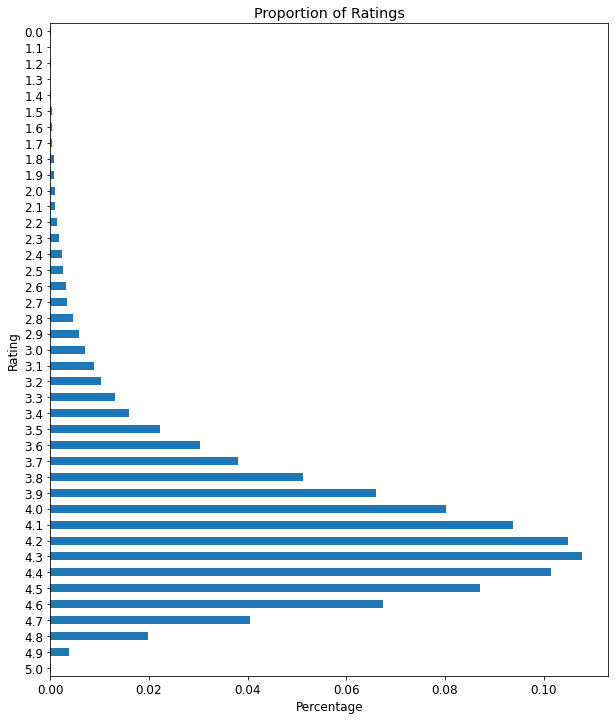

In [280]:
plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 12)})
plt.ylabel('Rating')
plt.xlabel('Percentage')
million['Rating'].value_counts(normalize=True).sort_index().plot(kind="barh", title='Proportion of Ratings');
plt.gca().invert_yaxis()

### Average rating per category (Over 1 million installs)

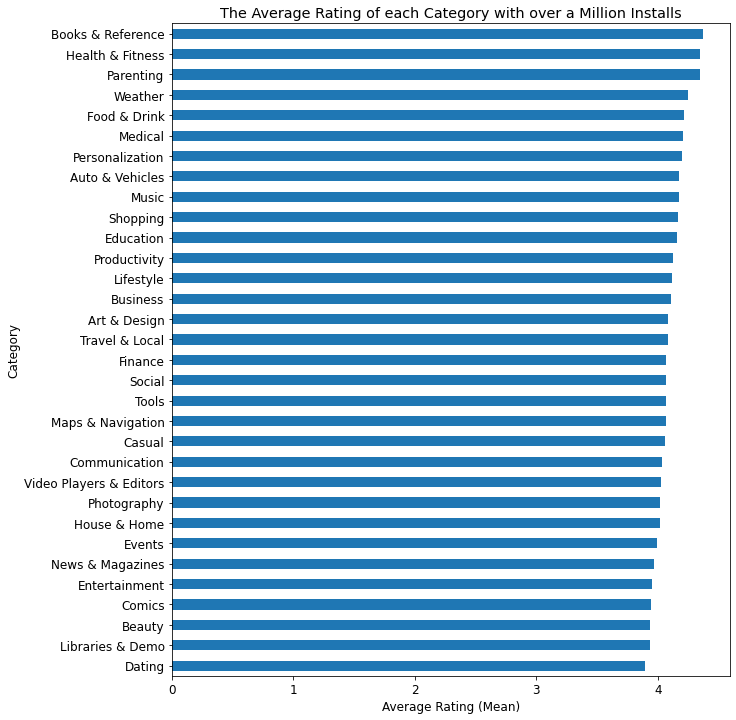

In [284]:
average = million.groupby('Category')['Rating'].mean()

plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 12)})
plt.ylabel('Category')
plt.xlabel('Average Rating (Mean)')
average.sort_values(ascending=False).plot(kind="barh", title='The Average Rating of each Category with over a Million Installs');
plt.gca().invert_yaxis()

### Ratings over 4.0

In [285]:
good_rating = million[million['Rating'] >= 4.0]

### Proportion of Categories

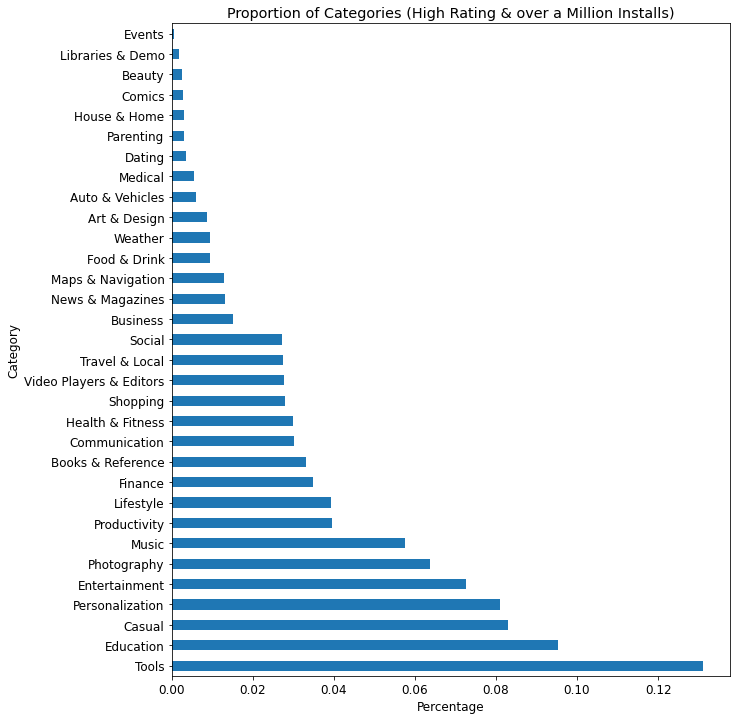

In [289]:
plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 12)})
plt.ylabel('Category')
plt.xlabel('Percentage')
good_rating['Category'].value_counts(normalize=True).plot(kind="barh", title='Proportion of Categories (High Rating & over a Million Installs)');
#plt.gca().invert_yaxis()

### Average number of installs per category

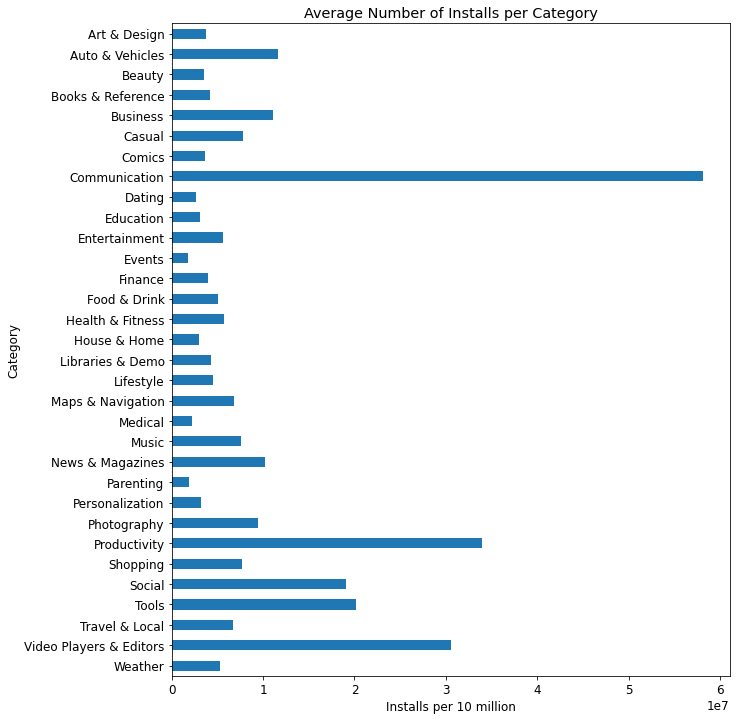

In [291]:
average_install = good_rating.groupby('Category')['Minimum Installs'].mean()
plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 12)})
plt.ylabel('Category')
plt.xlabel('Installs per 10 million')
average_install.sort_index().plot(kind="barh", title='Average Number of Installs per Category');
plt.gca().invert_yaxis()

### Average installs per age rating

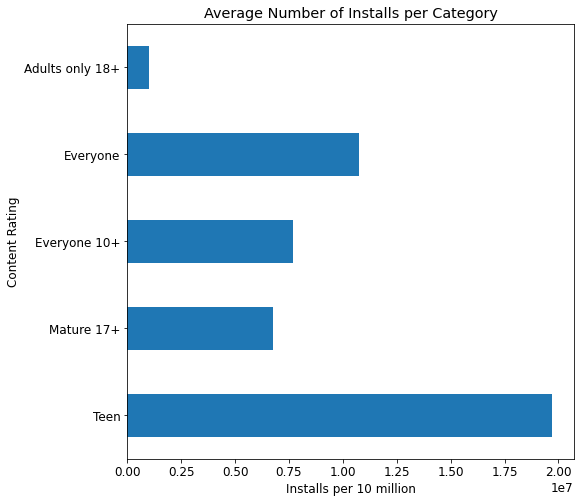

In [292]:
age_install = good_rating.groupby('Content Rating')['Minimum Installs'].mean()

plt.rcParams.update({'font.size': 12, 'figure.figsize': (8, 8)})
plt.ylabel('Category')
plt.xlabel('Installs per 10 million')
age_install.sort_index().plot(kind="barh", title='Average Number of Installs per Category');
plt.gca().invert_yaxis()

### Editors Choice

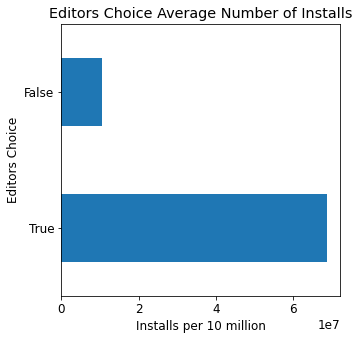

In [293]:
editor_install = good_rating.groupby('Editors Choice')['Minimum Installs'].mean()

plt.rcParams.update({'font.size': 12, 'figure.figsize': (5, 5)})
plt.ylabel('Category')
plt.xlabel('Installs per 10 million')
editor_install.sort_index().plot(kind="barh", title='Editors Choice Average Number of Installs');
plt.gca().invert_yaxis()

In [178]:
ad_install = good_rating.groupby('Ad Supported')['Minimum Installs'].mean()
in_app_install = good_rating.groupby('In App Purchases')['Minimum Installs'].mean()

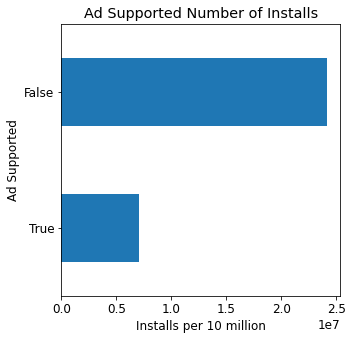

In [294]:
plt.rcParams.update({'font.size': 12, 'figure.figsize': (5, 5)})
plt.ylabel('Category')
plt.xlabel('Installs per 10 million')
ad_install.sort_index().plot(kind="barh", title='Ad Supported Number of Installs');
plt.gca().invert_yaxis()

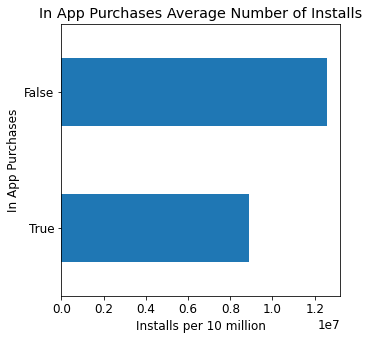

In [295]:
plt.rcParams.update({'font.size': 12, 'figure.figsize': (5, 5)})
plt.ylabel('Category')
plt.xlabel('Installs per 10 million')
in_app_install.sort_index().plot(kind="barh", title='In App Purchases Average Number of Installs');
plt.gca().invert_yaxis()